### Import Libraries

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz

### Load Datasets

In [30]:
df = pd.read_csv("./diabetes.csv")
df = df.drop(columns=['SkinThickness'])
df = df.dropna()

df = df[(df[['Glucose','BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction','Age']] != 0).all(axis=1)]

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
6,3,78,50,88,31.0,0.248,26,1
8,2,197,70,543,30.5,0.158,53,1
13,1,189,60,846,30.1,0.398,59,1


### Prepare Training & Test Data

In [34]:
split_data = train_test_split(df, test_size=.30)

train_data = split_data[0]
test_data = split_data[1]

outcome_train = train_data.Outcome.tolist()
outcome_test = test_data.Outcome.tolist()

train_data_remove = train_data.drop(columns = "Outcome")
test_data_remove = test_data.drop(columns = "Outcome")

# Compersions of Tree Algorithms

### ID3

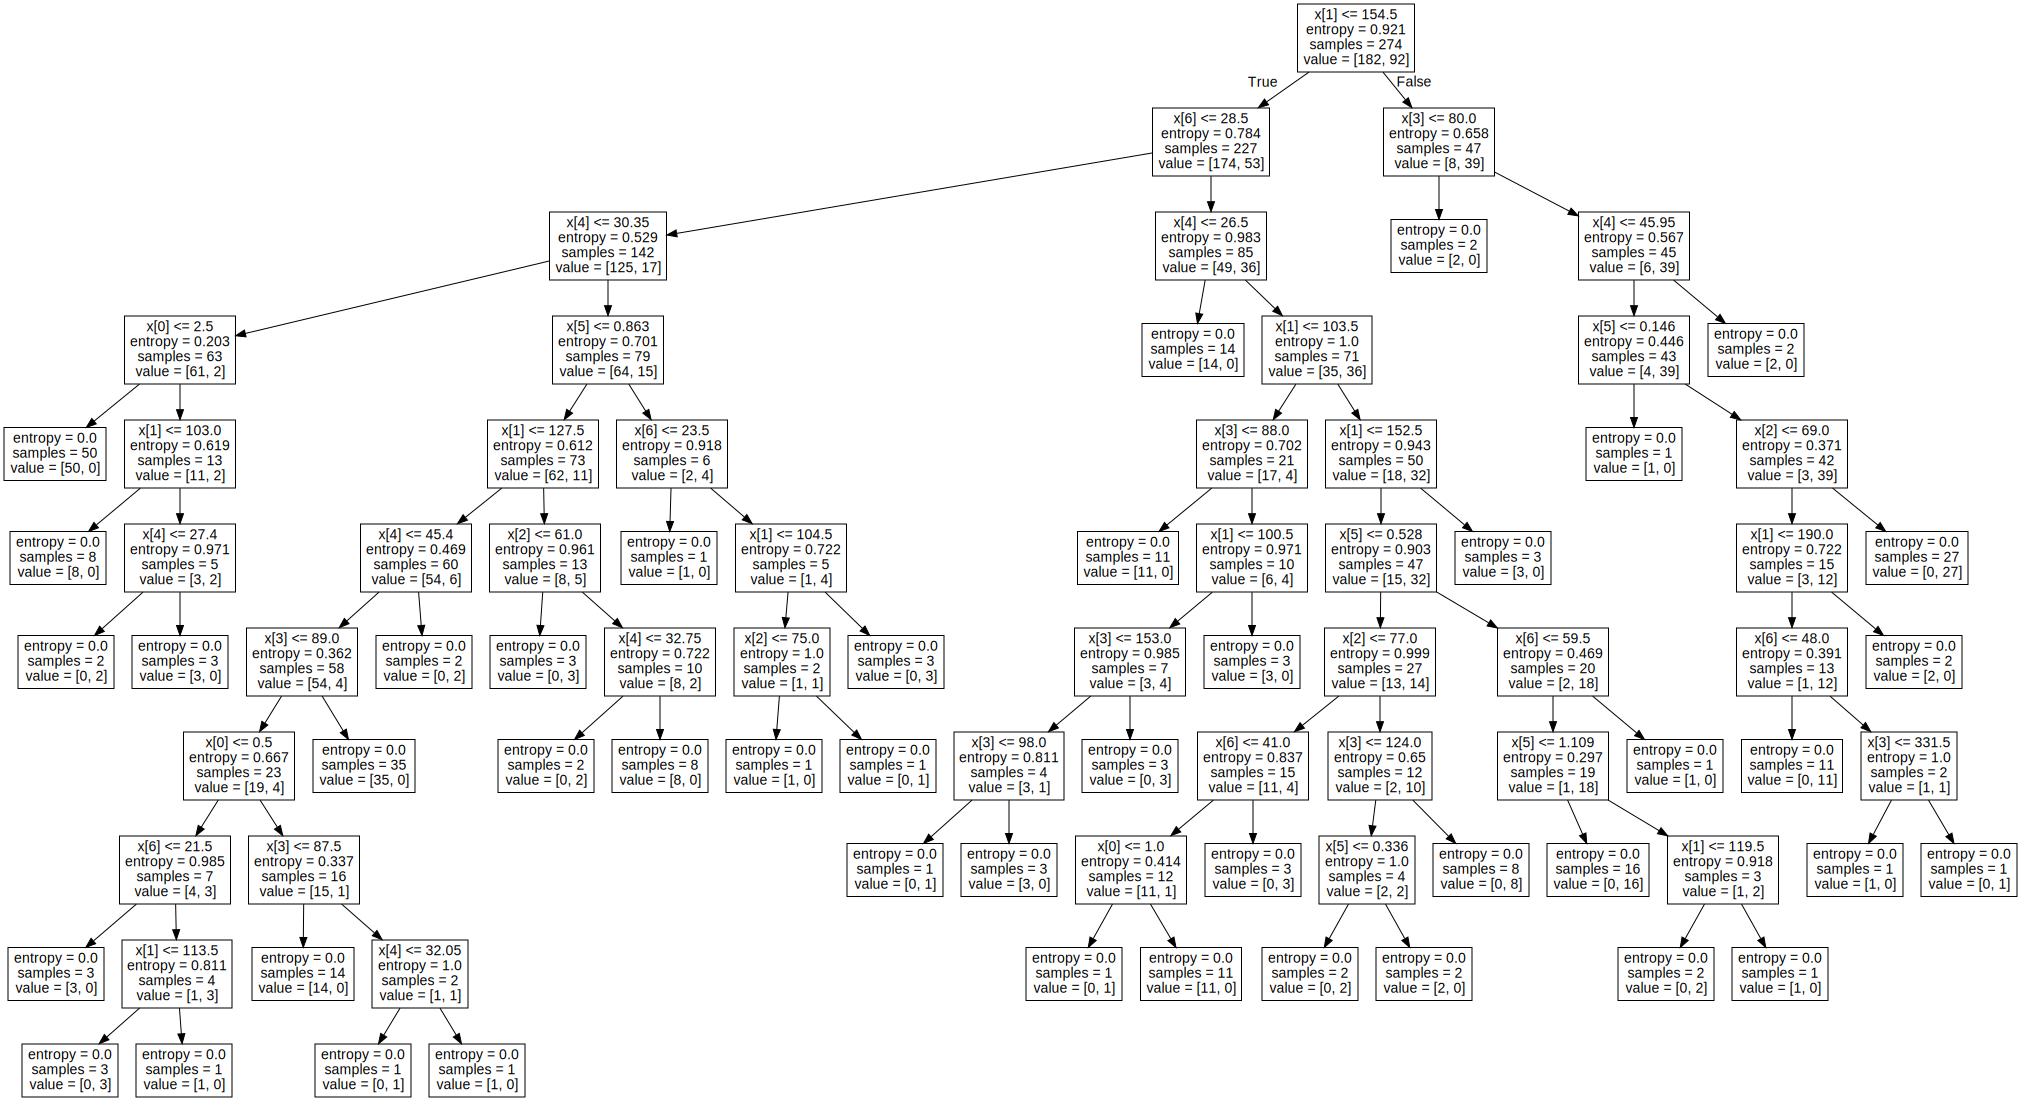

In [36]:
# ID3
clf = sklearn.tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(train_data_remove, outcome_train)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

graph

### Accuracy of ID3

In [37]:
test_array = clf.predict(test_data_remove).tolist()
ID3TestAccuracy = sklearn.metrics.accuracy_score(outcome_test, test_array)

print('ID3 Testing accuracy: ',ID3TestAccuracy)

ID3 Testing accuracy:  0.7627118644067796


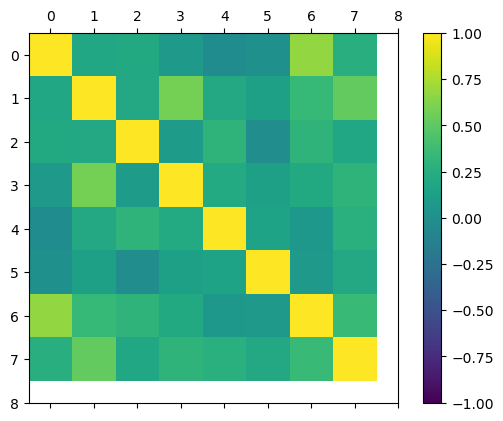

In [38]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [39]:
train_array = clf.predict(train_data_remove).tolist()
ID3TrainAccuracy = sklearn.metrics.accuracy_score(outcome_train, train_array)

print('ID3 Training accuracy: ',ID3TrainAccuracy)

ID3 Training accuracy:  1.0


### c4.5

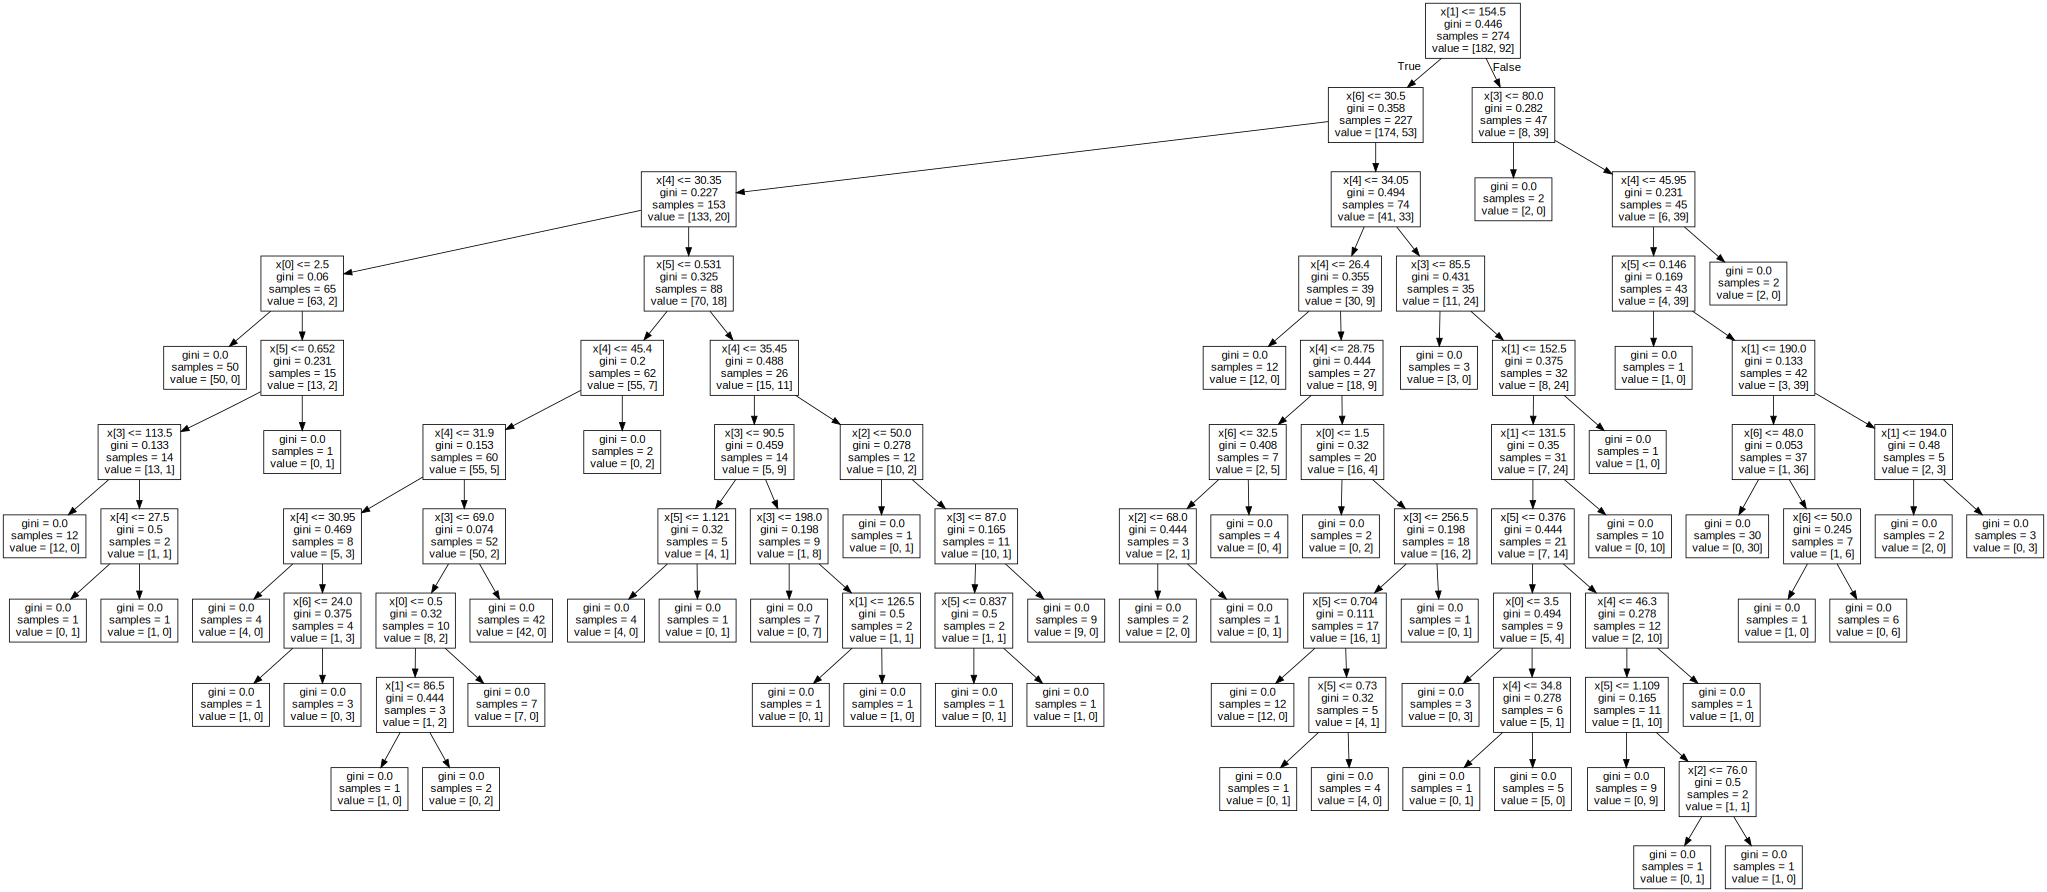

In [40]:
# C4.5
clf2 = sklearn.tree.DecisionTreeClassifier()

clf2.fit(train_data_remove, outcome_train)

dot_data = tree.export_graphviz(clf2, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

graph

In [41]:
test_array2 = clf2.predict(test_data_remove).tolist()
CTestAccuracy = sklearn.metrics.accuracy_score(outcome_test, test_array2)

print('C4.5 Testing accuracy: ',CTestAccuracy)

C4.5 Testing accuracy:  0.7457627118644068


In [42]:
train_array2 = clf2.predict(train_data_remove).tolist()

CTrainAccuracy = sklearn.metrics.accuracy_score(outcome_train, train_array2)

print('C4.5 Training accuracy: ', CTrainAccuracy)

C4.5 Training accuracy:  1.0


In [12]:
prediction_test = clf.predict(test_data_remove).tolist()
print("TESTING DATA")
print('Confusion Matrix with Testing Data with ID3 Algorithm:')
print(confusion_matrix(outcome_test, prediction_test))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(outcome_test, prediction_test))
print()
print()
print("TRAINING DATA")
prediction_train = clf.predict(train_data_remove).tolist()

print('Confusion Matrix with Training Data with ID3 Algorithm:')
print(confusion_matrix(outcome_train, prediction_train))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(outcome_train, prediction_train))

TESTING DATA
Confusion Matrix with Testing Data with ID3 Algorithm:
[[66 13]
 [15 24]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        79
           1       0.65      0.62      0.63        39

    accuracy                           0.76       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.76      0.76      0.76       118



TRAINING DATA
Confusion Matrix with Training Data with ID3 Algorithm:
[[183   0]
 [  0  91]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        91

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



In [13]:
prediction_train2 = clf2.predict(train_data_remove).tolist()

print("TESTING DATA")
print('Confusion Matrix with Testing Data with C4.5 Algorithm: ')
print(confusion_matrix(outcome_train, prediction_train2))
print()
print('Classification Report C4.5 Algorithm:')
print(classification_report(outcome_train, prediction_train2))
print()
print()
print("TRAINING DATA")
print('Confusion Matrix with Training Data with C4.5 Algorithm:')
print(confusion_matrix(outcome_train, prediction_train2))
print()
print('Classification Report C4.5 Algorithm:')
print(classification_report(outcome_train, prediction_train2))

TESTING DATA
Confusion Matrix with Testing Data with C4.5 Algorithm: 
[[183   0]
 [  0  91]]

Classification Report C4.5 Algorithm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        91

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



TRAINING DATA
Confusion Matrix with Training Data with C4.5 Algorithm:
[[183   0]
 [  0  91]]

Classification Report C4.5 Algorithm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        91

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



### Random Forest

In [14]:
data = pd.read_csv('./diabetes.csv')

In [15]:
# We will be using upsampling technique
from sklearn.utils import resample
data_major = data[(data['Outcome']==0)]
data_minor = data[(data['Outcome']==1)]
upsample = resample(data_minor,
                    replace = True,
                    n_samples = 500,
                    random_state= 42)
df = pd.concat([upsample, data_major])

In [16]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       147
           1       0.84      0.94      0.89       153

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[119  28]
 [  9 144]]


Accuracy Score =  0.88


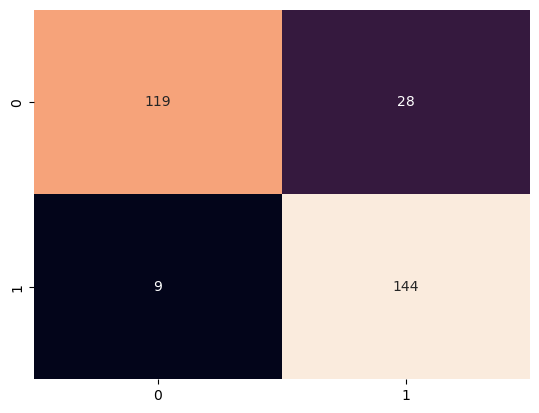

In [22]:
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test,pred_rf),2))